# Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). The actual rating was almost always rounded up to the nearest half-star.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

### In my project I'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandango_score_comparison=pd.read_csv("fandango_score_comparison.csv")
movie16_17=pd.read_csv("movie_ratings_16_17.csv")

In [4]:
fandango_score_comparison.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [5]:
movie16_17.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [6]:
Fandango=fandango_score_comparison.columns.str.contains("Fandango")
FILM=fandango_score_comparison.columns.str.contains("FILM")
u=fandango_score_comparison.columns[Fandango+FILM]
Fandango_score14_15=fandango_score_comparison[u]
Fandango_score14_15.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [7]:
Fandango_score14_15.Fandango_votes.min() ## All moovies are popular and we can't 
##discard them from the whole research

35

In [8]:
movie_rating16_17=movie16_17[['movie', 'year', 'fandango']]
movie_rating16_17.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [9]:
Fandango_score14_15.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [10]:
Fandango_score14_15["Film"]=Fandango_score14_15["FILM"].str.replace(")","").str.split("(").str[0]
Fandango_score14_15["Year"]=Fandango_score14_15["FILM"].str.replace(")","").str.split("(").str[1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
Fandango_score14_15.Year.value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
Fandango_score14_15=Fandango_score14_15[['Film', 'Year', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
Fandango_score14_15.head(3)

,Film,Year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5
1,Cinderella,2015,5.0,4.5,12640,0.5
2,Ant-Man,2015,5.0,4.5,12055,0.5


### 2014 year

In [13]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Stars"].value_counts().sort_index()

3.0    1
3.5    4
4.0    4
4.5    6
5.0    2
Name: Fandango_Stars, dtype: int64

In [14]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Ratingvalue"].value_counts().sort_index()

2.9    1
3.2    1
3.4    2
3.5    3
3.7    1
3.8    1
4.1    3
4.2    1
4.3    2
4.6    2
Name: Fandango_Ratingvalue, dtype: int64

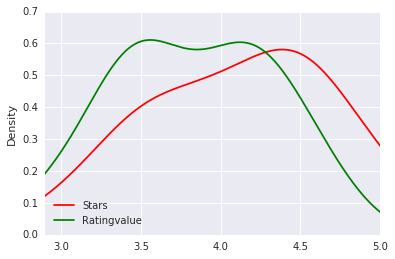

In [15]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Stars"].plot.kde(label="Stars", legend=True, color="r")
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Ratingvalue"].plot.kde(label="Ratingvalue", legend=True, color="g")
plt.xlim(2.9,5)
plt.show()

We can observe the shift between actual values and stars, as was predicted. And the maximum from stars values is higher than from actual

### 2015 year

In [16]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Stars"].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [17]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Ratingvalue"].value_counts().sort_index()

2.7     2
2.8     2
2.9     4
3.0     4
3.1     3
3.2     4
3.3     4
3.4     7
3.5     6
3.6     8
3.7     8
3.8     4
3.9    12
4.0     7
4.1    13
4.2    11
4.3     9
4.4     7
4.5     9
4.6     2
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

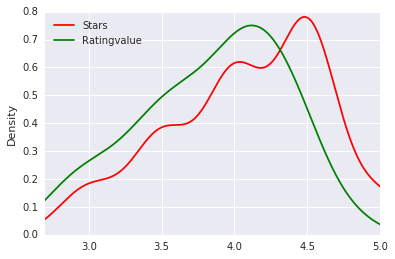

In [18]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Stars"].plot.kde(label="Stars", legend=True, color="r")
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Ratingvalue"].plot.kde(label="Ratingvalue", legend=True, color="g")
plt.xlim(2.7,5)
plt.show()

The same story we can see in 2015 year. And here we can notice pickes on "Stars graph" related with integer and half integer values. But so far we can assess the shift to the right and maximun, which is higher than on the actual plot.

### Comparison 2014-2015 fandango rating and stars

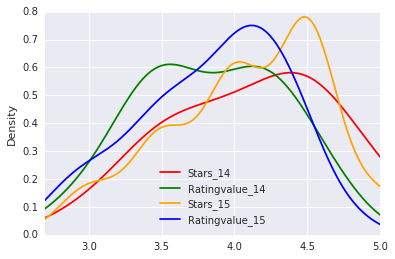

In [19]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Stars"].plot.kde(label="Stars_14", legend=True, color="r")
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2014","Fandango_Ratingvalue"].plot.kde(label="Ratingvalue_14", legend=True, color="g")
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Stars"].plot.kde(label="Stars_15", legend=True, color="orange")
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Ratingvalue"].plot.kde(label="Ratingvalue_15", legend=True, color="blue")
plt.xlim(2.7,5)
plt.show()

Here we can noticed, that despite of the changes between actual values plots in 2014 and 2015 the stars trend didn't change. Actual maximum changed whereas stars maximum didn't change.

### Comparison 2016 and 2017 fandango stars

In [101]:
a=len(movie_rating16_17.loc[movie_rating16_17["year"]==2016,"fandango"])
print ("The total number of test values")
print (a)
movie_rating16_17.loc[movie_rating16_17["year"]==2016,"fandango"].value_counts().sort_index()

The total number of test values
191


2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [102]:
a=len(movie_rating16_17.loc[movie_rating16_17["year"]==2017,"fandango"])
print ("The total number of test values")
print (a)
movie_rating16_17.loc[movie_rating16_17["year"]==2017,"fandango"].value_counts().sort_index()

The total number of test values
23


3.0     4
3.5     4
4.0     5
4.5    10
Name: fandango, dtype: int64

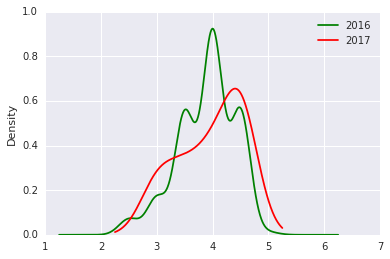

In [104]:
movie_rating16_17.loc[movie_rating16_17["year"]==2016,"fandango"].plot.kde(label="2016", legend=True, color="g")
movie_rating16_17.loc[movie_rating16_17["year"]==2017,"fandango"].plot.kde(label="2017", legend=True, color="r")

It's complicated to gouge the shift in 2017 because lack of values for investigation. I believe data will be more consistent after adding more samples.

### Comparison 2015 and 2016 

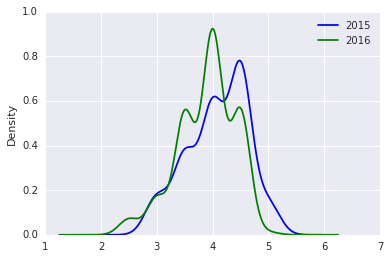

In [20]:
Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015","Fandango_Stars"].plot.kde(label="2015", legend=True, color="blue")
movie_rating16_17.loc[movie_rating16_17["year"]==2016,"fandango"].plot.kde(label="2016", legend=True, color="g")

In view of the work, which were performed in Fandango code, we can notice, that trend changed. And we can observe maximum and plot itself shift to the left. Here we can assume, that debugging really was done.

In [21]:
print('2015' + '\n' + '-' * 50)

2015
--------------------------------------------------


In [22]:
Fandango_score15=Fandango_score14_15.loc[Fandango_score14_15["Year"]=="2015"]
Fandango_score15["Fandango_Stars"].value_counts(dropna=True, normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
print('2016' + '\n' + '-' * 50)

2016
--------------------------------------------------


In [24]:
movie_rating16=movie_rating16_17.loc[movie_rating16_17["year"]==2016]
movie_rating16["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

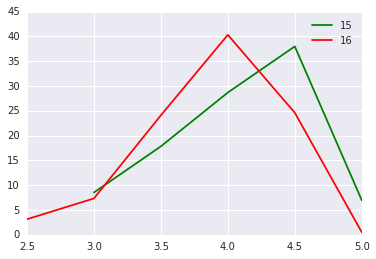

In [25]:
rating15=Fandango_score15["Fandango_Stars"].value_counts(normalize=True).sort_index()*100
rating16=movie_rating16["fandango"].value_counts(normalize=True).sort_index()*100
rating15.plot(label="15", legend=True, color="green")
rating16.plot(label="16", legend=True, color="red")

The graph of 16 year shifted compare with the 15 one. It looks like the company really did something in the way of rounding to the bigger value and subsequently to the exaggerated initial values. Now we can rely on them more than before. The maximum shifted from 4.5 to 4.0. At the same time we can see that minimum became 2.5 insted of 3.0. It look like before 2.5 was rounded to the 3.0. It is a good tendency.


In [65]:
Fandango_score15["Fandango_Stars"].mode()

0    4.5
dtype: float64

In [74]:
df=pd.DataFrame({"2015":[Fandango_score15["Fandango_Stars"].mode()[0],
                         Fandango_score15["Fandango_Stars"].mean(),
                         Fandango_score15["Fandango_Stars"].median()],
                  "2016":[movie_rating16["fandango"].mode()[0],
                         movie_rating16["fandango"].mean(),
                         movie_rating16["fandango"].median()]})
df.index=["mode","mean","median"]

In [75]:
df

,2015,2016
mode,4.500000,4.000000
mean,4.085271,3.887435
median,4.000000,4.000000


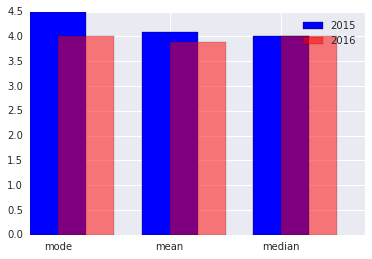

In [100]:
plt.figsize = (10,5)
df["2015"].plot.bar(color="blue",align="center",legend=True, rot=0)
df["2016"].plot.bar(color="red",align="edge", alpha=0.5,legend=True, rot=0)

## Co